### Bitcoin historic data (extraction)
**Working on it...**

Good [website](http://www.cryptodatadownload.com/) to start with.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib.pyplot as plt

# Package installation for financial visulizations
#!pip install --upgrade mplfinance
import mplfinance as mpf
import plotly.graph_objs as go

plt.style.use('seaborn')
%matplotlib inline

#### Prepare the Bitcoin datasets

In [2]:
btc_path_min = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/crypto/BTCUSDT_1m_data.csv'
btc_path_hour = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/crypto/BTCUSDT_1h_data.csv'
columns_to_use = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
# Minutely BTC
btc_min = pd.read_csv(btc_path_min, usecols=columns_to_use)
df_btc_m = btc_min.copy()
# Hourly BTC
btc_hour = pd.read_csv(btc_path_hour, usecols=columns_to_use)
df_btc_h = btc_hour.copy()

df_btc_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117177 entries, 0 to 117176
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  117177 non-null  object 
 1   open       117177 non-null  float64
 2   high       117177 non-null  float64
 3   low        117177 non-null  float64
 4   close      117177 non-null  float64
 5   volume     117177 non-null  float64
dtypes: float64(5), object(1)
memory usage: 5.4+ MB


In [3]:
# Convert to datetime and set date as index
# Minutely
df_btc_m['timestamp'] = pd.to_datetime(df_btc_m['timestamp'])
df_btc_m = df_btc_m.rename(columns = {'timestamp': 'date'}).set_index('date')
# Hourly
df_btc_h['timestamp'] = pd.to_datetime(df_btc_h['timestamp'])
df_btc_h = df_btc_h.rename(columns = {'timestamp': 'date'}).set_index('date')

df_btc_m.head(3)

,open,high,low,close,volume
date,,,,,
2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032
2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501
2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329


Now, we have a lot of data here that it will be helpful in the future. But now we just want to build a preliminary project with toy data, so let's take a look at the longest volume traded in the time of study.. **Same dates as twitter extraction sample we got earlier.** <br> Let's do it baby!

In [4]:
max_volume = (df_btc_m['volume'] == df_btc_m['volume'].max())
# Date with the greatest volume of bitcoins traded
df_btc_m[max_volume]

,open,high,low,close,volume
date,,,,,
2021-02-22 02:04:00,56705.76,56730.01,55351.15,56354.97,1866.93905


In [5]:
# Preparing the df to plot it 

intraday = df_btc_m[(df_btc_m.index > '2021-02-21 15:00:00') & (df_btc_m.index < '2021-02-22 09:00:00')]
# intraday.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
# intraday.set_index('Date', inplace=True)
print(intraday.shape)
intraday.head()

(1079, 5)


,open,high,low,close,volume
date,,,,,
2021-02-21 15:01:00,57484.30,57555.00,57484.30,57500.02,50.714899
2021-02-21 15:02:00,57504.83,57524.75,57395.08,57411.54,45.697068
2021-02-21 15:03:00,57411.54,57411.54,57288.00,57320.00,45.517284
2021-02-21 15:04:00,57320.00,57364.78,57296.31,57336.65,29.003769
2021-02-21 15:05:00,57336.65,57361.38,57250.00,57284.22,42.343511


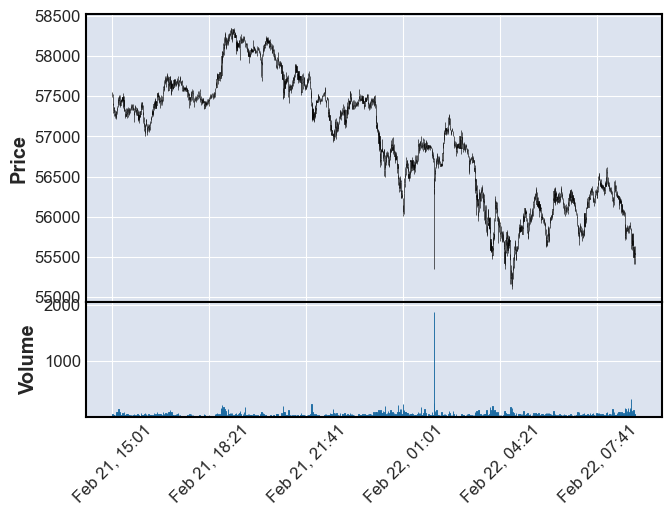

In [6]:
mpf.plot(intraday, type='candle', volume=True)

Actually plot this with plotly. Study how to implement it.

In [7]:
# fig = go.Candlestick(x=intraday.index,
#                open=intraday['open'],
#                high=intraday['high'],
#                low=intraday['low'],
#                close=intraday['close']);
# fig.ishow()

In [8]:
# # Volume of bitcoins traded in US dollars
# plt.figure(figsize=(10, 6))
# plt.plot(df_btc['date'], df_btc['volume_usd'])

# plt.title('Volume of bitcoins traded in USD')
# plt.xlabel('date (month-day hour)')
# plt.ylabel('million USD')

# Twitter sentiments

### Groupbies and sum by time frames

In [7]:
tweets_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/twitter/scored_tweets.csv'

tweets = pd.read_csv(tweets_path)
df_tweets = tweets.copy()
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets = df_tweets[(df_tweets['date'] >= '2021-02-21') & (df_tweets['date'] <= '2021-03-21')]
df_tweets.set_index('date', inplace=True)
print(df_tweets.info())
df_tweets.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508479 entries, 2021-02-21 00:00:00 to 2021-03-20 23:50:31
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1508479 non-null  int64  
 1   text            1508478 non-null  object 
 2   followers       1508479 non-null  int64  
 3   likes           1508479 non-null  int64  
 4   vader_polarity  1508479 non-null  float64
 5   emotion         1508479 non-null  object 
 6   vader_score     1508479 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 92.1+ MB
None


,id,text,followers,likes,vader_polarity,emotion,vader_score
date,,,,,,,
2021-02-21,1363277252306358275,RT : Join the Airdrop to get a share of 5 mill...,49,0,0.5267,Positive,2.58083
2021-02-21,1363277252557955072,RT : Because not everyone knows: If Bitcoin’s ...,127,0,0.0516,Positive,0.65532
2021-02-21,1363277252633354242,RT : In 24 hours I’m going to give one random ...,11,0,0.0000,Neutral,0.00000


In [8]:
minutely_vader_scores = df_tweets.groupby(pd.Grouper(freq='min'))[['vader_polarity', 'vader_score']].sum()
hourly_vader_scores = df_tweets.groupby(pd.Grouper(freq='h'))[['vader_score']].sum()

# one_min_textblob_scores = df_tweets.groupby(pd.Grouper(freq='min'))[['textblob_polarity', 'textblob_score']].sum()
# one_h_textblob_scores = df_tweets.groupby(pd.Grouper(freq='min'))[['textblob_score']].sum()

print(minutely_vader_scores.sample(3))
# print('*' * 50)
# print(one_min_textblob_scores.sample(3))

                     vader_polarity  vader_score
date                                            
2021-02-28 06:03:00             0.0          0.0
2021-02-28 07:28:00             0.0          0.0
2021-03-09 01:47:00             0.0          0.0


### Trying to implement log scale in vader hourly

In [11]:
def apply_log(score):
    if score < 0:
        return -np.log1p(-score)
    return np.log1p(score)

# hourly_vader_scores['log_vader'] = hourly_vader_scores['vader_score'].apply(apply_log)

In [12]:
# plt.style.use('seaborn')
# plt.plot(hourly_vader_scores['log_vader'])

### Charts

Text(0, 0.5, 'Total Score')

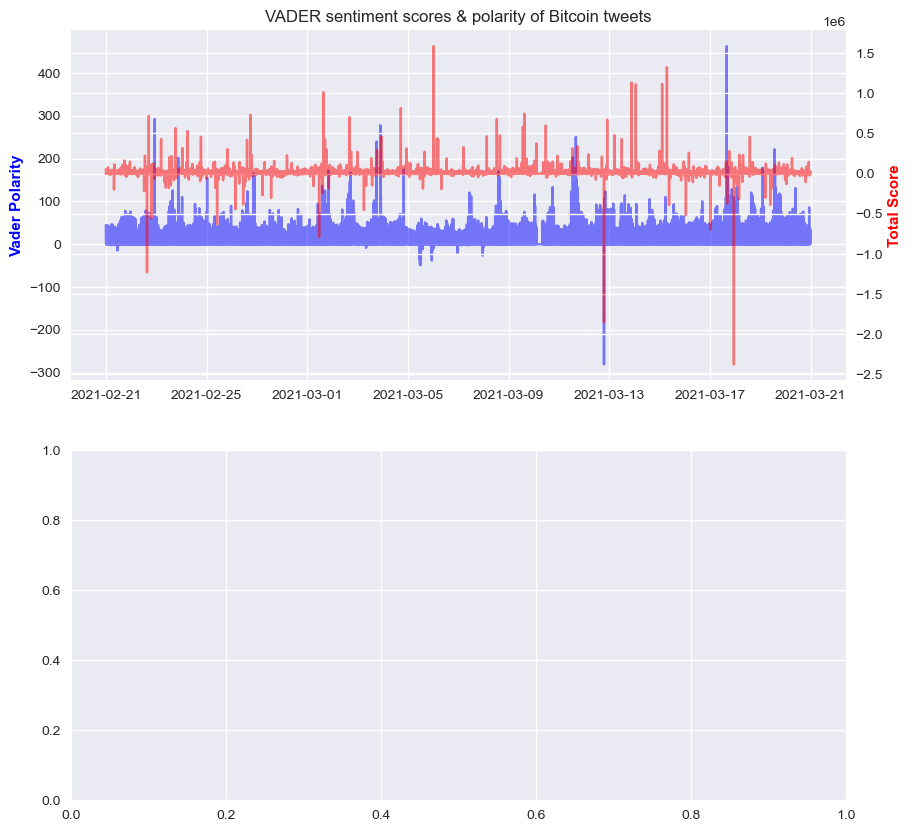

In [9]:
plt.style.use('seaborn')

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
# VADER plot
axes[0].set_title('VADER sentiment scores & polarity of Bitcoin tweets')
ax1 = axes[0].twinx()
axes[0].plot(minutely_vader_scores.index, minutely_vader_scores['vader_polarity'], 'b', alpha=0.5)
ax1.plot(minutely_vader_scores.index, minutely_vader_scores['vader_score'], 'r', alpha=0.5)
axes[0].set_ylabel('Vader Polarity', color='b')
ax1.set_ylabel('Total Score', color='r')

# # TextBlob plot
# axes[1].set_title('TextBlob sentiment scores & polarity of Bitcoin tweets')
# ax2 = axes[1].twinx()
# axes[1].plot(one_min_vader_scores.index, one_min_textblob_scores['textblob_polarity'], 'b', alpha=0.5)
# ax2.plot(one_min_vader_scores.index, one_min_textblob_scores['textblob_score'], 'r', alpha=0.5)
# axes[1].set_ylabel('Textblob Polarity', color='b')
# ax2.set_ylabel('Total Score', color='r')

It looks like there is, at least, one outstanding positive outlier in VADER score.

## VADER Analysis

### Minutely

#### Data merging

In [10]:
# Reduce bitcoin df length to match 
df_btc_m = df_btc_m[(df_btc_m.index >= df_tweets.index.min()) & (df_btc_m.index <= df_tweets.index.max())]

In [11]:
data_m = pd.merge(df_btc_m, minutely_vader_scores, right_index=True, left_index=True)
data_m.head(3)

,open,high,low,close,volume,vader_polarity,vader_score
date,,,,,,,
2021-02-21 00:00:00,55841.19,55987.97,55822.33,55885.13,134.205366,43.8765,53938.34267
2021-02-21 00:01:00,55882.34,55899.83,55622.30,55748.36,117.877839,27.2732,-4157.33769
2021-02-21 00:02:00,55754.73,55850.00,55731.33,55745.63,87.712717,43.4384,1480.53613


In [12]:
data_m['vader_score'].min(), data_m['vader_score'].max()

(-2374292.626230004, 1585797.1987900015)

In [21]:
# Remove outliers
# We remove 1 max. & 2 min. outliers
data_m['vader_no_outliers'] = data_m['vader_no_outliers'].replace([data_m['vader_no_outliers'].min()], data_m['vader_score'].mean())

#### Plot

Text(0, 0.5, 'VADER Sentiment Score')

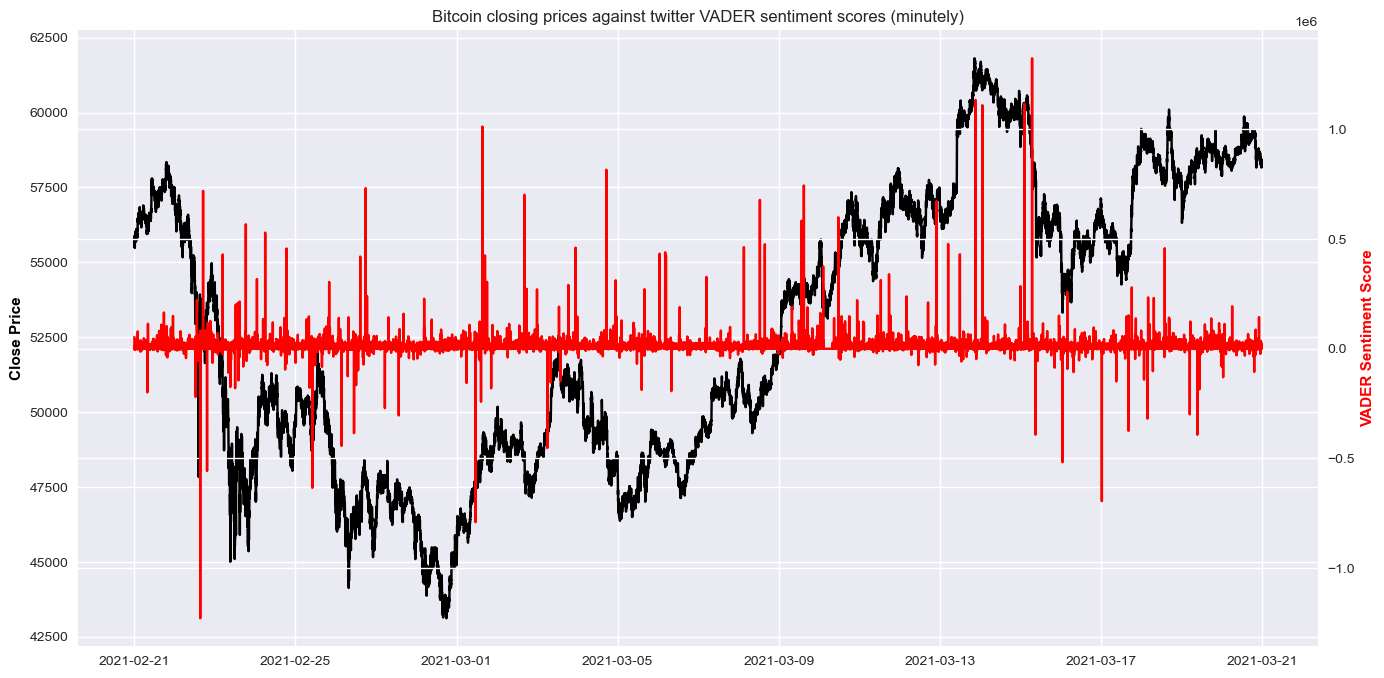

In [22]:
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_title('Bitcoin closing prices against twitter VADER sentiment scores (minutely)')
ax2 = ax1.twinx()

ax1.plot(data_m.index, data_m['close'], 'k')
ax2.plot(data_m.index, data_m['vader_no_outliers'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('VADER Sentiment Score', color='r')

#### Correlation coefficients

We are going to calculate correlation coefficients between Bitcoin close prices and VADER sentiment scores. We need to check if there is any lag between people posting tweets and the actual price changing.

In [14]:
# Defining some functions
def corr_coef(x, y, method, lag=0):
    """It returns a correlation coeficient.
    
    Parameters
    -----------
    x : pandas.Series
    y : pandas.Series
    method : 'pearson' , 'spearman', 'kendall'
    lag : number of desire lags"""
    
    return x.corr(y.shift(lag), method)


def plot_coef(coefs, range_, name):
    """Plots linear chart given a corr coefficient and a specific range.
    
    Parameters
    ----------
    coefs : list of coefficients
    range_ : range
    name : str. Coefficient name"""
    plt.figure(figsize=(6, 4))
    plt.plot(coefs, range_)
    plt.title(f'{name} Correlation Coefficient')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')

In [23]:
# Defining some variables
x = data_m['vader_no_outliers']
y = data_m['close']
minutely_range = range(-60*5, 60*5)

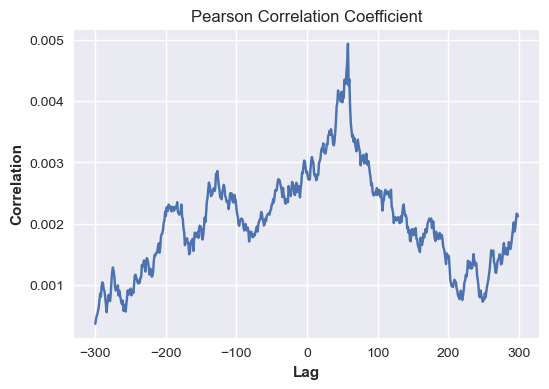

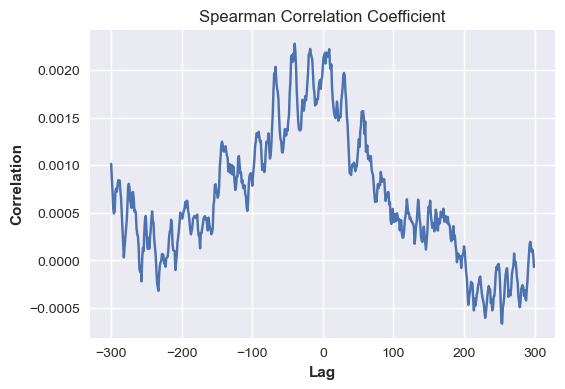

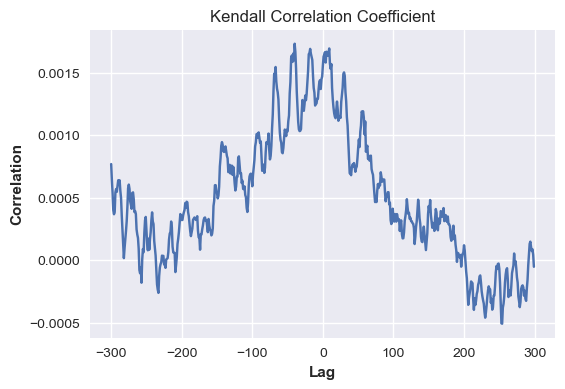

In [24]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in minutely_range]
plot_coef(minutely_range, coef, 'Kendall')

### Hourly

In [25]:
# Reduce bitcoin df length to match 
df_btc_h = df_btc_h[(df_btc_h.index >= df_tweets.index.min()) & (df_btc_h.index <= df_tweets.index.max())]

data_h = pd.merge(df_btc_h, hourly_vader_scores, right_index=True, left_index=True)
data_h.head()

,open,high,low,close,volume,vader_score
date,,,,,,
2021-02-21 00:00:00,55841.19,56061.64,55477.59,55834.95,2949.777561,154319.02855
2021-02-21 01:00:00,55834.95,56351.08,55717.87,56347.69,2125.263288,102026.76434
2021-02-21 02:00:00,56347.70,56660.94,56253.77,56318.08,2201.031649,182005.34381
2021-02-21 03:00:00,56318.08,56900.00,56311.40,56505.22,2027.220197,62987.43980
2021-02-21 04:00:00,56505.22,56725.12,56040.31,56701.08,2060.642337,117490.73592


In [42]:
# Remove outliers
data_h['vader_no_outliers'] = data_h['vader_no_outliers'].replace([data_h['vader_no_outliers'].max()], data_h['vader_score'].mean())

In [30]:
data_h['vader_score'].max(), data_h['vader_no_outliers'].max()

(3267029.2490199953, 1841065.3521800064)

#### Plot

Text(0, 0.5, 'VADER Sentiment Score')

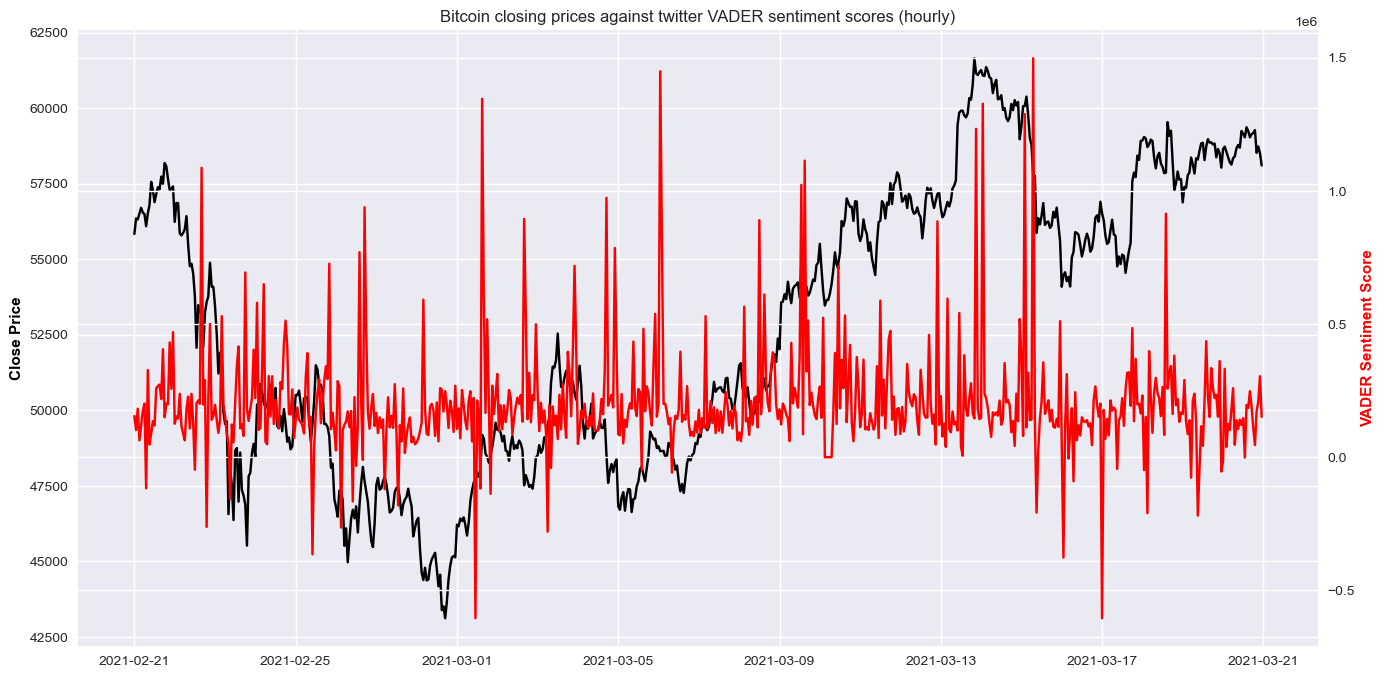

In [43]:
fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.set_title('Bitcoin closing prices against twitter VADER sentiment scores (hourly)')
ax2 = ax1.twinx()

ax1.plot(data_h.index, data_h['close'], 'k')
ax2.plot(data_h.index, data_h['vader_no_outliers'], 'r')

ax1.set_ylabel('Close Price', color='k')
ax2.set_ylabel('VADER Sentiment Score', color='r')

#### Correlation Coefficients

In [44]:
# Defining some variables
x = data_h['vader_no_outliers']
y = data_h['close']
hourly_range = range(-30, 30)

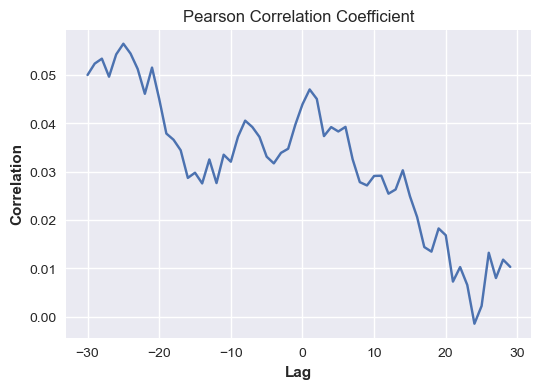

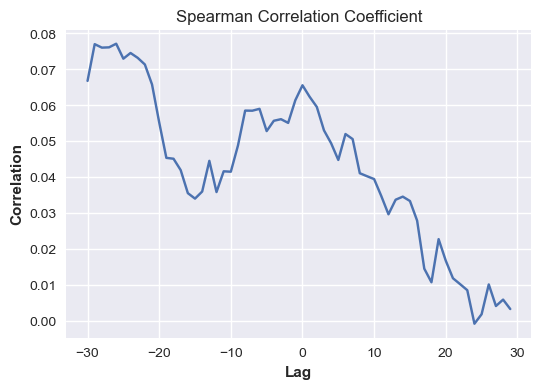

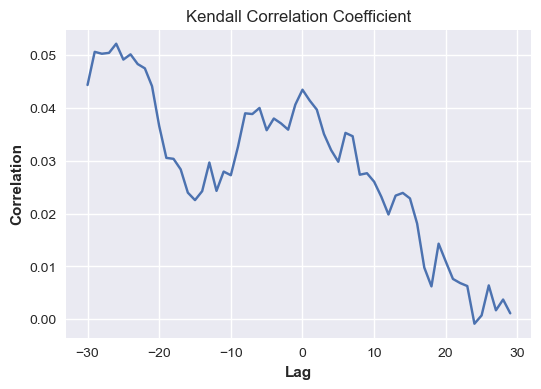

In [45]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

It seems that the variables are (slightly) more correlated when data is hourly aggregated.

### Standardized hourly data for VADER sentiments

In [46]:
df = data_h.drop(['open', 'high', 'low', 'vader_score'], axis=1)
df.head(3)

,close,volume,vader_score,vader_no_outliers
date,,,,
2021-02-21 00:00:00,55834.95,2949.777561,154319.02855,154319.02855
2021-02-21 01:00:00,56347.69,2125.263288,102026.76434,102026.76434
2021-02-21 02:00:00,56318.08,2201.031649,182005.34381,182005.34381


In [47]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns, index=df.index)
scaled_df

,close,volume,vader_score,vader_no_outliers
date,,,,
2021-02-21 00:00:00,0.657232,-0.169760,-0.165205,-0.238431
2021-02-21 01:00:00,0.767635,-0.572707,-0.350971,-0.494230
2021-02-21 02:00:00,0.761260,-0.535678,-0.066850,-0.102997
2021-02-21 03:00:00,0.801555,-0.620622,-0.489657,-0.685199
2021-02-21 04:00:00,0.843727,-0.604288,-0.296036,-0.418585
...,...,...,...,...
2021-03-20 19:00:00,1.397476,-1.116742,-0.551560,-0.770440
2021-03-20 20:00:00,1.235344,0.136532,-0.102482,-0.152062
2021-03-20 21:00:00,1.280329,-1.153955,0.030197,0.030636


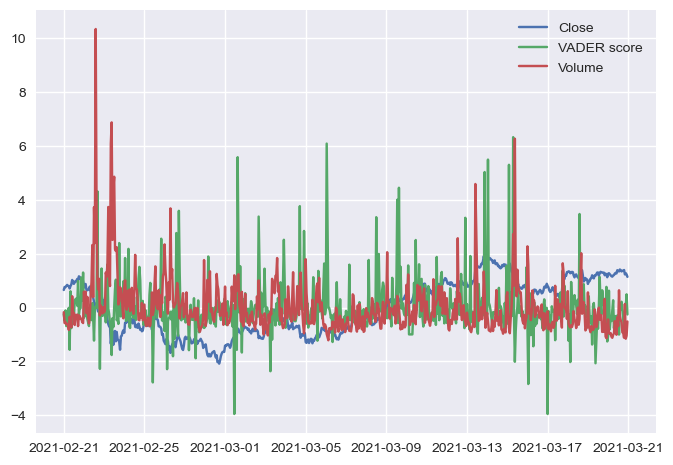

In [48]:
plt.plot(scaled_df['close'], label='Close')

plt.plot(scaled_df['vader_no_outliers'], label='VADER score')

plt.plot(scaled_df['volume'], label='Volume')

plt.legend()

#### Correlations

In [49]:
# Defining some variables
x_close = scaled_df['close']
y_vader = scaled_df['vader_no_outliers']
z_volume = scaled_df['volume']
hourly_range = range(-30, 30)

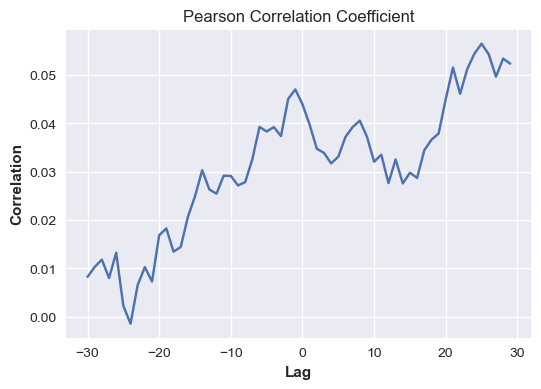

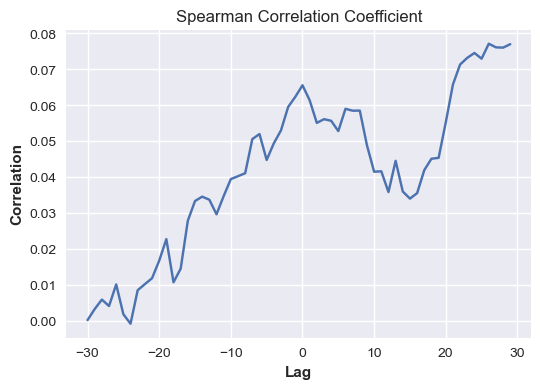

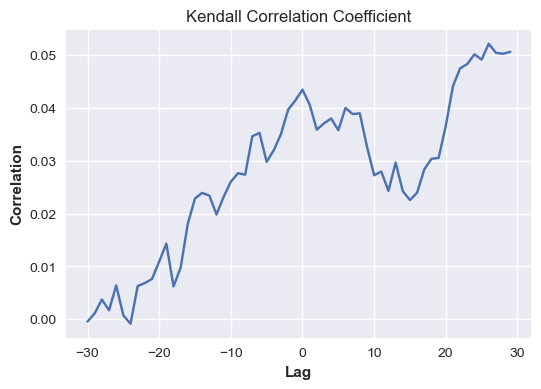

In [50]:
# Standarized close and VADER score with no outliers
coef = [corr_coef(x_close, y_vader, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x_close, y_vader, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x_close, y_vader, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

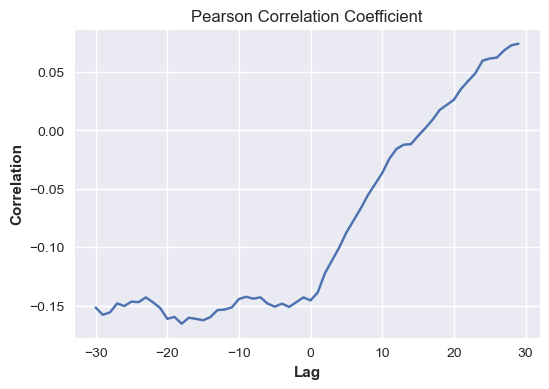

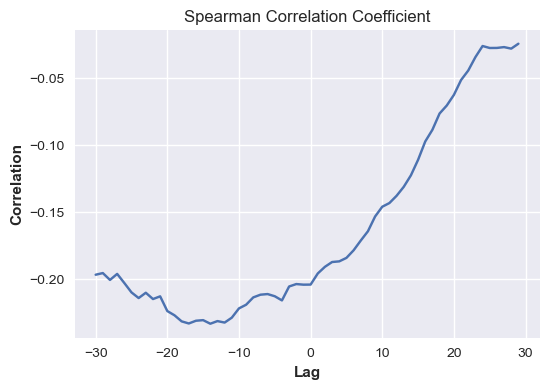

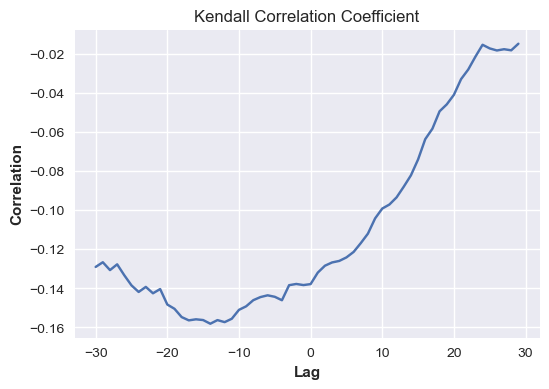

In [51]:
# Standardized Close and Volume
coef = [corr_coef(z_volume, x_close, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(z_volume, x_close, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(z_volume, x_close, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

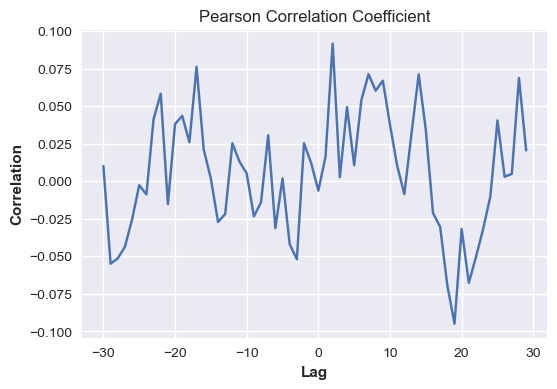

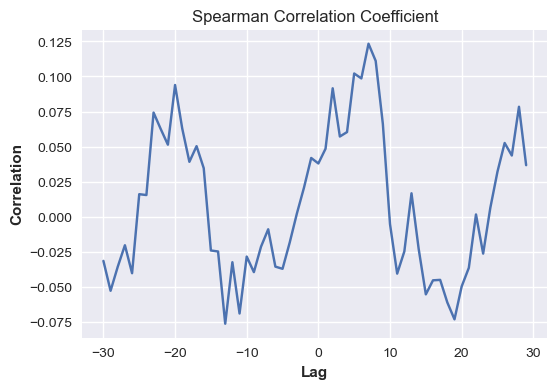

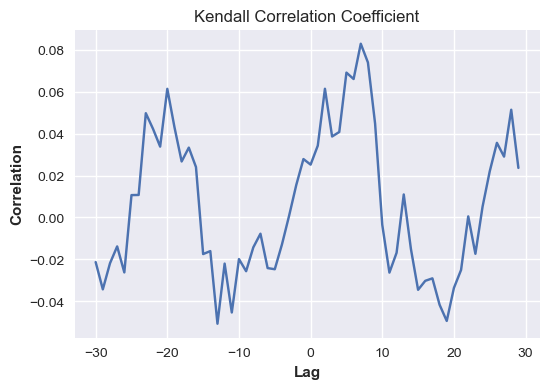

In [52]:
# Standarized volume and VADER score with no outliers
coef = [corr_coef(y_vader, z_volume, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(y_vader, z_volume, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(y_vader, z_volume, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

### Google Trends

In [53]:
btc_trends = pd.read_csv('C:/Users/Javi/Desktop/cryptocurrency_predictor/data/google_trends/bitcoin_trends.csv')
btc_trends.set_index('date', drop=True, inplace=True)
btc_trends.index = pd.to_datetime(btc_trends.index)

In [54]:
btc_h = btc_hour.copy()
btc_h.drop(['open', 'high', 'low'], axis=1, inplace=True)
btc_h.set_index('timestamp', drop=True, inplace=True)
btc_h.index = pd.to_datetime(btc_h.index)

In [55]:
btc_h = btc_h[(btc_h.index >= btc_trends.index.min()) & (btc_h.index <= btc_trends.index.max())]

In [56]:
len(btc_h), len(btc_trends)

(698, 701)

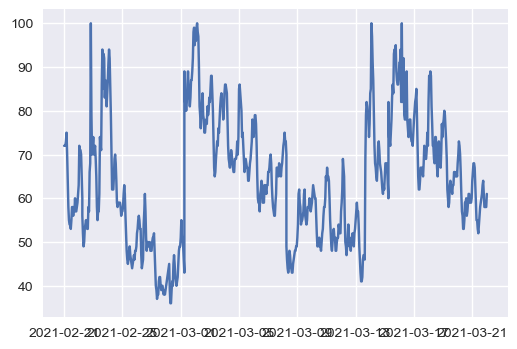

In [57]:
plt.figure(figsize=(6, 4))
plt.plot(btc_trends['bitcoin'])

#### Plot it

Text(0, 0.5, 'Bitcoin closing prices')

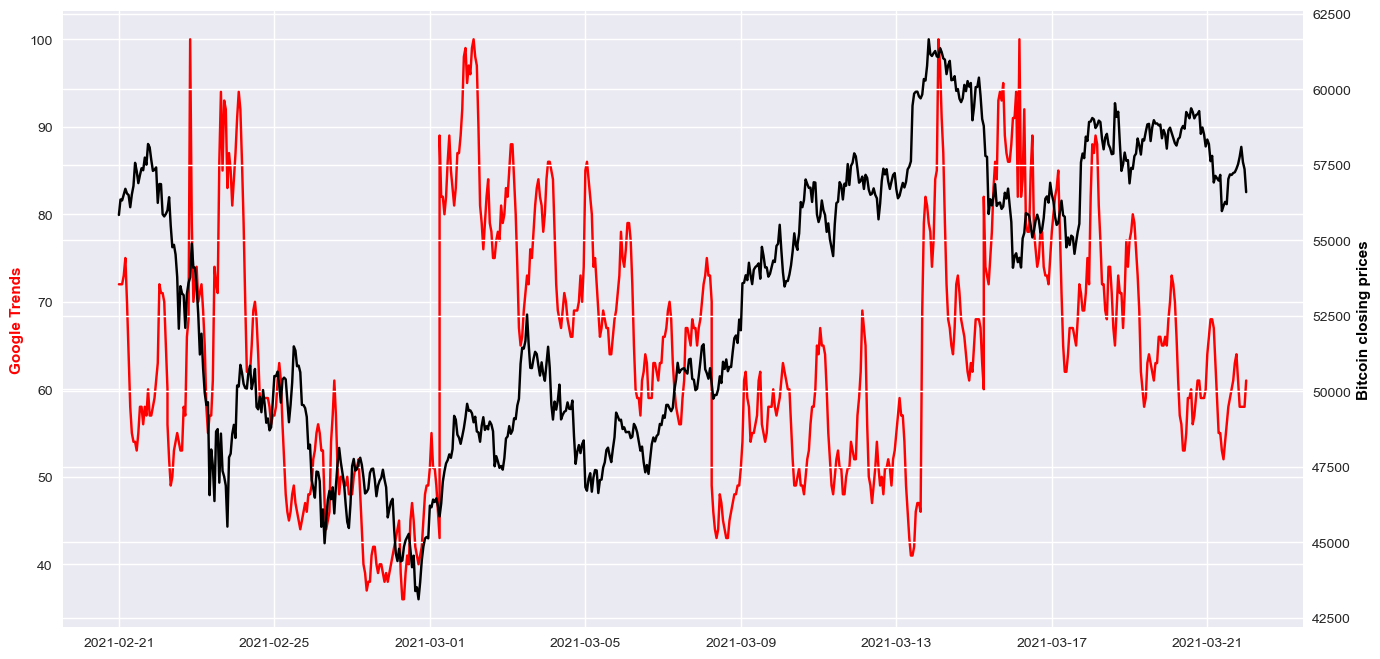

In [58]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()

ax1.plot(btc_trends.index, btc_trends['bitcoin'], 'r')
ax2.plot(btc_h.index, btc_h['close'], 'k')

ax1.set_ylabel('Google Trends', color='r')
ax2.set_ylabel('Bitcoin closing prices', color='k')

#### Correlations

In [59]:
# Defining some variables
x = btc_h['close']
y = btc_trends['bitcoin']
hourly_range = range(-30, 30)

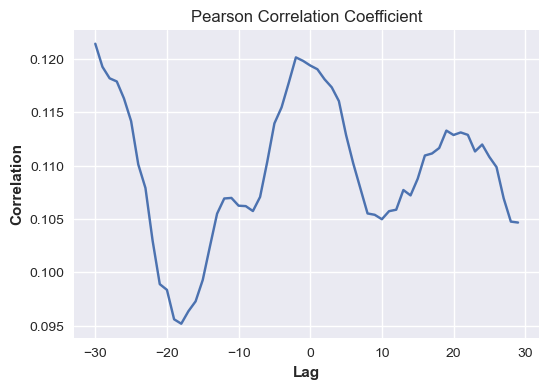

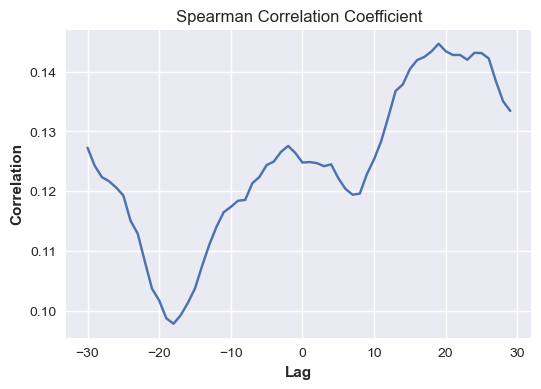

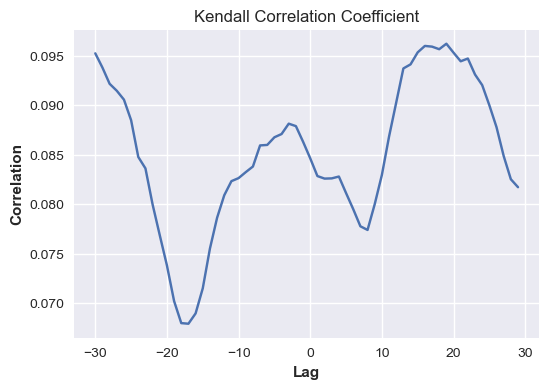

In [60]:
coef = [corr_coef(x, y, 'pearson', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Pearson')

coef = [corr_coef(x, y, 'spearman', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Spearman')

coef = [corr_coef(x, y, 'kendall', lag=lag) for lag in hourly_range]
plot_coef(hourly_range, coef, 'Kendall')

# Features
### Minutely

In [61]:
minutely = pd.DataFrame()
minutely['vader'] = data_m['vader_no_outliers']
minutely['volume'] = data_m['volume']
minutely['close'] = data_m['close']
minutely.reset_index(inplace=True)

In [62]:
label = []
for i in range(len(minutely['close'][:-1])):
    if minutely['close'][i+1] >= minutely['close'][i]:
        label.append(1)
    else:
        label.append(0)

In [63]:
minutely = minutely[:-1]
minutely['label'] = pd.Series(label)
minutely.drop(['date', 'close'], axis=1, inplace=True)
minutely

,vader,volume,label
0,53938.34267,134.205366,0
1,-4157.33769,117.877839,0
2,1480.53613,87.712717,1
3,4327.68297,59.355978,0
4,0.00000,63.994262,0
...,...,...,...
40217,24988.42689,19.153977,1
40218,2976.52558,29.151898,1
40219,3083.58951,14.906141,0
40220,15750.64411,14.553408,1


In [64]:
X = minutely[minutely.columns[:-1]]
y = minutely['label']

In [65]:
split_at = round(0.8*len(X))
X_train = X.iloc[:split_at]
X_test = X.iloc[split_at:]
y_train = y.iloc[:split_at]
y_test = y.iloc[split_at:]

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print(f'Train score: {logreg.score(X_train, y_train).round(3)}')
print(f'Test score: {logreg.score(X_test, y_test).round(3)}')

Train score: 0.503
Test score: 0.503


### Hourly

In [139]:
btc_trends = btc_trends[(btc_trends.index >= data_h.index.min()) & (btc_trends.index <= data_h.index.max())]
btc_trends

,bitcoin
date,
2021-02-21 00:00:00,72
2021-02-21 01:00:00,72
2021-02-21 02:00:00,72
2021-02-21 03:00:00,73
2021-02-21 04:00:00,75
...,...
2021-03-20 19:00:00,61
2021-03-20 20:00:00,59
2021-03-20 21:00:00,59


In [161]:
merged = pd.merge(data_h, btc_trends, left_index=True, right_index=True)
merged.drop(['open', 'high', 'low', 'vader_score'], axis=1, inplace=True)
merged.reset_index(inplace=True)
merged

,date,close,volume,vader_no_outliers,bitcoin
0,2021-02-21 00:00:00,55834.95,2949.777561,154319.02855,72
1,2021-02-21 01:00:00,56347.69,2125.263288,102026.76434,72
2,2021-02-21 02:00:00,56318.08,2201.031649,182005.34381,72
3,2021-02-21 03:00:00,56505.22,2027.220197,62987.43980,73
4,2021-02-21 04:00:00,56701.08,2060.642337,117490.73592,75
...,...,...,...,...,...
672,2021-03-20 19:00:00,59272.82,1012.055066,45561.98388,61
673,2021-03-20 20:00:00,58519.84,3576.514684,171975.12988,59
674,2021-03-20 21:00:00,58728.76,935.908920,209323.49340,59
675,2021-03-20 22:00:00,58503.01,1162.196427,304132.95533,59


In [162]:
label = []
for i in range(len(merged['close'][:-1])):
    if merged['close'][i+1] >= merged['close'][i]:
        label.append(1)
    else:
        label.append(0)

In [163]:
labeled_merge = merged[:-1]
labeled_merge['label'] = pd.Series(label)
labeled_merge.drop(['date'], axis=1, inplace=True)
labeled_merge

C:\Users\Javi\Anaconda3\envs\crypto-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Javi\Anaconda3\envs\crypto-env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,close,volume,vader_no_outliers,bitcoin,label
0,55834.95,2949.777561,154319.02855,72,1
1,56347.69,2125.263288,102026.76434,72,0
2,56318.08,2201.031649,182005.34381,72,1
3,56505.22,2027.220197,62987.43980,73,1
4,56701.08,2060.642337,117490.73592,75,0
...,...,...,...,...,...
671,59173.03,1437.476965,110575.21836,61,1
672,59272.82,1012.055066,45561.98388,61,0
673,58519.84,3576.514684,171975.12988,59,1
674,58728.76,935.908920,209323.49340,59,0


In [166]:
X = labeled_merge[labeled_merge.columns[:-1]]
y = labeled_merge['label']

split_at = round(0.8*len(X))
X_train = X.iloc[:split_at]
X_test = X.iloc[split_at:]
y_train = y.iloc[:split_at]
y_test = y.iloc[split_at:]

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
print(f'Train score: {logreg.score(X_train, y_train).round(3)}')
print(f'Test score: {logreg.score(X_test, y_test).round(3)}')

Train score: 0.553
Test score: 0.496


In [167]:
X = labeled_merge[labeled_merge.columns[:-1]]
y = labeled_merge['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression().fit(X_train, y_train)
print(f'Train score: {logreg.score(X_train, y_train).round(3)}')
print(f'Test score: {logreg.score(X_test, y_test).round(3)}')

Train score: 0.531
Test score: 0.538


In [168]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

split_at = round(0.8*len(X_scaled))
X_train_scaled = X_scaled.iloc[:split_at]
X_test_scaled = X_scaled.iloc[split_at:]
y_train = y.iloc[:split_at]
y_test = y.iloc[split_at:]

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Train score: {logreg.score(X_train_scaled, y_train).round(3)}')
print(f'Test score: {logreg.score(X_test_scaled, y_test).round(3)}')

Train score: 0.553
Test score: 0.467


In [155]:
# Save it to a csv
merged.to_csv('C:/Users/Javi/Desktop/cryptocurrency_predictor/data/features.csv')